In [86]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.datasets import cifar10

In [87]:
import numpy as np 
import matplotlib.pyplot as plt

In [88]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [89]:
x_train.shape

(50000, 32, 32, 3)

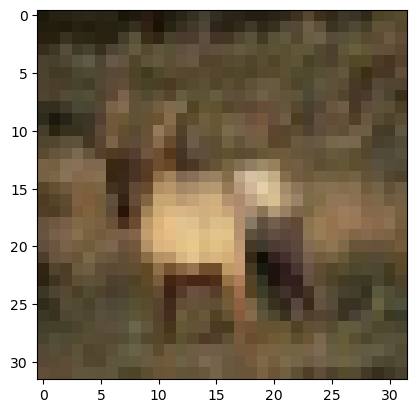

In [90]:
plt.imshow(x_train[3])

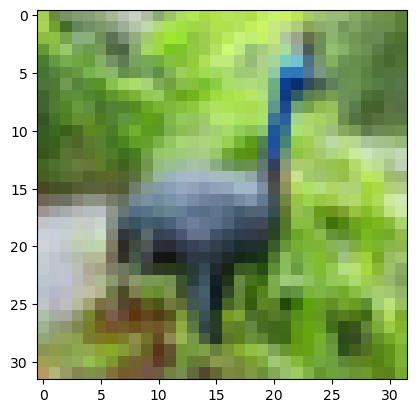

In [91]:
plt.imshow(x_train[6])

## Data Cleansing

In [92]:
## Dimention Reduction to make the nombre 0 to 1
x_train = x_train.astype("float32")/255
x_train = x_test.astype("float32")/255

In [93]:
## Knwoing the dimension, we have 10 possible outputs
len(np.unique(y_train))


10

In [94]:
num_class = len(np.unique(y_train))
# to categorical 10 classes in train & test
y_train = to_categorical(y_train, num_class)
y_test = to_categorical(y_test, num_class)

In [95]:
#Showing "1" when is in one class
y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [96]:
#separating our training set in validation, training and test

(x_train, x_valid) = x_train[5000:] , x_train[:5000]
(y_train, y_valid) = y_train[5000:] , y_train[:5000]

print('x_train shape', x_train.shape)

print("train:" , x_train.shape[0])
print("validation:" , x_valid.shape[0])
print("test:" , x_test.shape[0])

x_train shape (5000, 32, 32, 3)
train: 5000
validation: 5000
test: 10000


## Model

In [97]:
filtter_base = 32
w_regularizer = 1e-4

In [98]:
 x_train.shape[1:]
#this shape is the inpout, images 32x32 in 3 layers

(32, 32, 3)

In [99]:
model = Sequential()

#Conv1
    #number of filters in convolution layer
model.add(Conv2D(filtter_base,(3,3), padding="same", kernel_regularizer=regularizers.l2(w_regularizer), input_shape = x_train.shape[1:]))
#this time the kernel size will be 3x3   #padding equal to the image, so "same" used
model.add(Activation("relu"))

#Conv2
model.add(Conv2D(filtter_base,(3,3), padding="same", kernel_regularizer=regularizers.l2(w_regularizer)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2))) # MaxPooling to reduce complex
model.add(Dropout(0.2)) #to reduce overfitting

#Conv3       #making the layer deeper (x2)
model.add(Conv2D(2*filtter_base,(3,3), padding="same", kernel_regularizer=regularizers.l2(w_regularizer)))
model.add(Activation("relu"))
model.add(Dropout(0.2)) 

#Conv4      
model.add(Conv2D(2*filtter_base,(3,3), padding="same", kernel_regularizer=regularizers.l2(w_regularizer)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Dropout(0.3)) 

#Max Pooling every 2 convolution

#Conv5        #Even deeper
model.add(Conv2D(4*filtter_base,(3,3), padding="same", kernel_regularizer=regularizers.l2(w_regularizer)))
model.add(Activation("relu"))

#Conv6      
model.add(Conv2D(4*filtter_base,(3,3), padding="same", kernel_regularizer=regularizers.l2(w_regularizer)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Dropout(0.4)) 


#Flatten Clasification

# Making the result only to 1 dimention
model.add(Flatten())
model.add(Dense(num_class, activation="softmax")) #remenber softmax to a multiple classification solving

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_9 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 activation_10 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 32)        0         
                                                      